# Clonal analysis

In [1]:
import cospar as cs

In [2]:
cs.logging.print_version()
cs.settings.verbosity = 2  # range: 0 (error),1 (warning),2 (info),3 (hint).
cs.settings.set_figure_params(
    format="png", figsize=[4, 3.5], dpi=75, fontsize=14, pointsize=3
)

Running cospar 0.3.0 (python 3.9.16) on 2023-07-14 11:53.


In [3]:
# Each dataset should have its folder to avoid conflicts.
cs.settings.data_path = "data_cospar"
cs.settings.figure_path = "fig_cospar"
cs.hf.set_up_folders()

Load an existing dataset. (If you have pre-processed data, you can load it with `cs.hf.read(file_name)`.)

In [4]:
adata_orig = cs.datasets.hematopoiesis_subsampled()

Show barcode heatmap as aggregated into given fate clusters (defined in `adata_orig.obs['state_info']`)

Data saved at adata.uns['barcode_heatmap']


<Axes: title={'center': '431 clones'}>

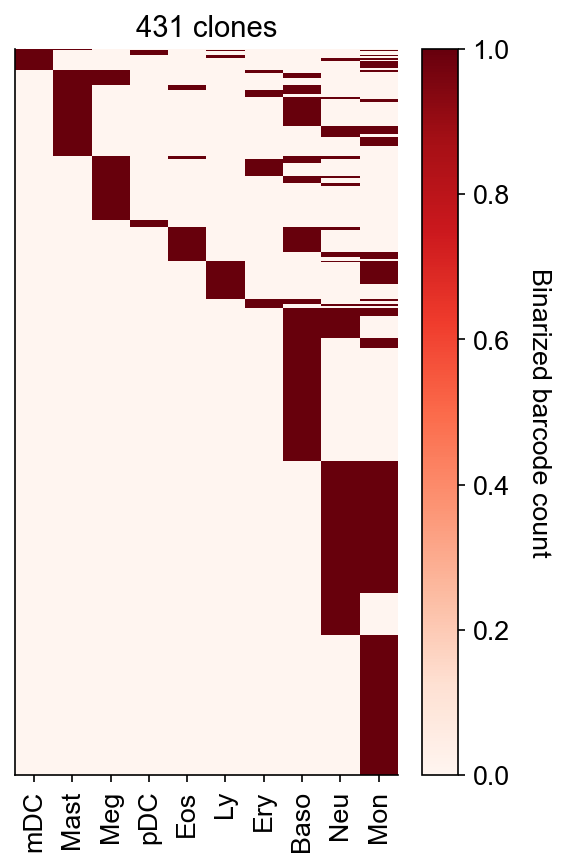

In [5]:
selected_times = None
selected_fates = [
    "Ccr7_DC",
    "Mast",
    "Meg",
    "pDC",
    "Eos",
    "Lymphoid",
    "Erythroid",
    "Baso",
    "Neutrophil",
    "Monocyte",
]
celltype_names = ["mDC", "Mast", "Meg", "pDC", "Eos", "Ly", "Ery", "Baso", "Neu", "Mon"]
cs.pl.barcode_heatmap(
    adata_orig,
    selected_times=selected_times,
    selected_fates=selected_fates,
    color_bar=True,
    rename_fates=celltype_names,
    log_transform=False,
    binarize=True,
)

Fate coupling in the underlying clonal data, defined in our package as the normalized barcode covariance between cells annotated in different fates.

normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
Results saved as dictionary at adata.uns['fate_coupling_X_clone']


<Axes: title={'center': 'source: X_clone'}>

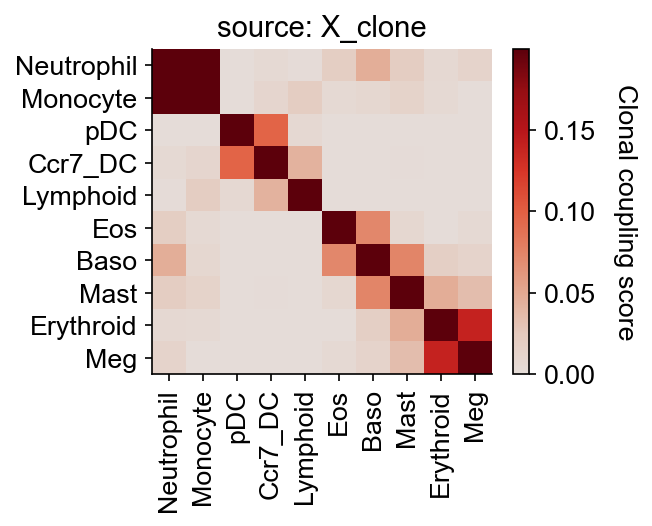

In [6]:
cs.tl.fate_coupling(
    adata_orig, selected_fates=selected_fates, source="X_clone"
)  # compute the fate coupling
cs.pl.fate_coupling(adata_orig, source="X_clone")  # actually plot the coupling

Fate hierarchy constructed from fate coupling of the underlying clonal data, using the neighbor-joining method.

In [7]:
cs.tl.fate_hierarchy(
    adata_orig, selected_fates=selected_fates, source="X_clone"
)  # compute the fate hierarchy
cs.pl.fate_hierarchy(adata_orig, source="X_clone")  # actually plot the hierarchy

normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
normalize by X_clone
each cluster do not have a unique time point. Simply column-normalize the matrix
Results saved as dictionary at adata.uns['fate_hierarchy_X_clone']

               /-Baso
            /-|
         /-|   \-Mast
        |  |
      /-|   \-Eos
     |  |
     |  |   /-E

Next, we compute the clonal fate bias, -log(Q-value). We calculated a P-value that that a clone is enriched (or depleted) in a fate, using Fisher-Exact test (accounting for clone size). The P-value is then corrected to give a Q-value by Benjamini-Hochberg procedure. The alternative hypothesis options are: {'two-sided','greater','less'}. The default is 'two-sided'.
    
    

100%|████████████████████████████████████████| 500/500 [00:00<00:00, 914.93it/s]


Data saved at adata.uns['clonal_fate_bias']


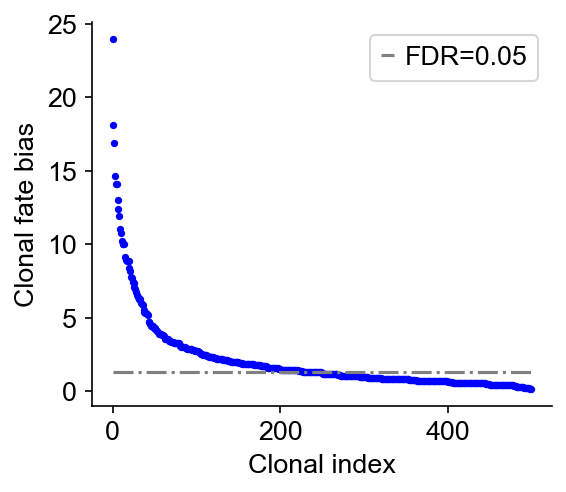

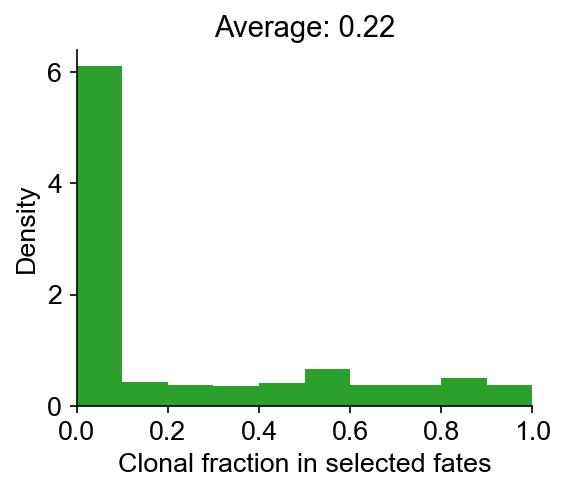

In [8]:
cs.tl.clonal_fate_bias(
    adata_orig, selected_fate="Monocyte", alternative="two-sided"
)  # compute the fate hierarchy
cs.pl.clonal_fate_bias(adata_orig)  # actually plot the hierarchy

In [9]:
result = adata_orig.uns["clonal_fate_bias"]
result

,clone_id,clone_size,P_value,clonal_fraction_in_target_fate,Fate_bias
488,488,58,1.105140e-24,0.896552,23.956583
387,387,37,7.630927e-19,0.945946,18.117423
227,227,45,1.250056e-17,0.866667,16.903071
302,302,112,2.278106e-15,0.000000,14.642426
162,162,42,7.468800e-15,0.833333,14.126749
...,...,...,...,...,...
79,79,5,6.159379e-01,0.200000,0.210463
207,207,5,6.159379e-01,0.200000,0.210463
58,58,8,6.526613e-01,0.250000,0.185312
6,6,4,6.969634e-01,0.250000,0.156790


Illustrate some most biased clones.

ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


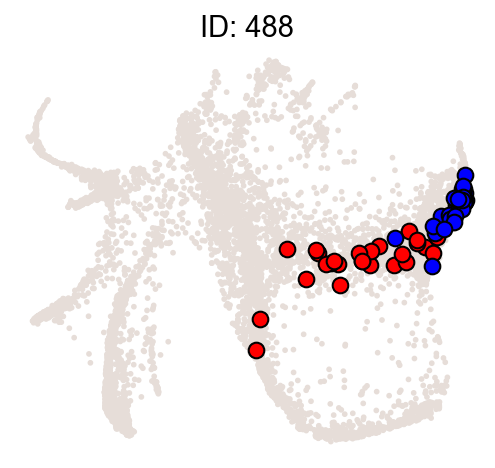

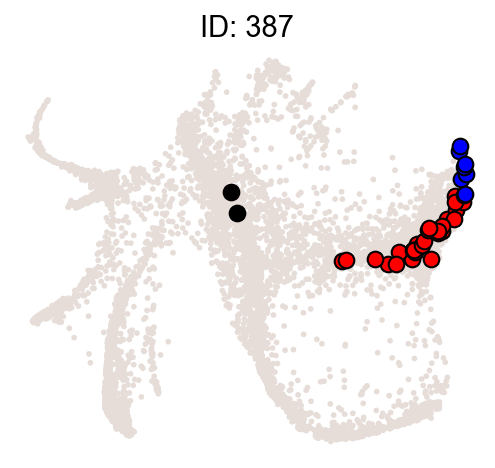

In [10]:
ids = result["clone_id"][:2]
cs.pl.clones_on_manifold(
    adata_orig,
    selected_clone_list=ids,
    color_list=["black", "red", "blue"],
    clone_markersize=15,
)